# 서울 온도 데이터 (1970년 ~ 2021년)를 활용한 데이터 전처리와 시각화 과정

# 목차
<br>

## - **모듈 불러오기**
## - **CSV 파일 읽기**
## - **Dataframe 정보 출력하기**
## - **None값 제거하기**
## - **subplot을 이용해 한 그래프안에 여러개의 1970년 서울 온도 데이터 시각화하기**
## - **subplot을 이용해 한 그래프안에 여러개의 2021년 서울 온도 데이터 시각화하기 (동일)**
## - **Line plot 시각화하기 (1970년~2021년) 평균 날씨 데이터**
## - **연별 최고 기온 데이터 구성**
## - **연별 최고 기온 주석이 포함된 그래프 시각화**
## - **연별 최저 기온 데이터 구성 (동일)**
## - **연별 최저 기온 주석이 포함된 그래프 시각화 (동일)**
## - **subplot을 이용해 여러개의 그래프 만들기**
### **(연별 최고기온, 최저기온 월 비율 Bar Plot & Pie Chart 시각화)**

# 모듈 불러오기

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# CSV 파일 읽기

In [ ]:
df = pd.read_csv('data.csv', encoding='cp949')
print(df.head())

  \t\t지점번호 지점명          일시  평균기온(℃)  평균최고기온(℃)  최고기온(℃)    \t최고기온일자  \
0  \t\t108  서울  1970-01-01     -4.8        0.0      8.9  1970-01-28   
1  \t\t108  서울  1970-02-01     -0.2        4.7     12.0  1970-02-19   
2  \t\t108  서울  1970-03-01      0.4        4.8     16.0  1970-03-29   
3  \t\t108  서울  1970-04-01     12.2       18.3     26.0  1970-04-30   
4  \t\t108  서울  1970-05-01     18.7       24.6     29.8  1970-05-24   

   평균최저기온(℃)  최저기온(℃)      최저기온일자  
0       -8.8    -20.2  1970-01-05  
1       -3.9    -10.8  1970-02-10  
2       -3.2     -7.3  1970-03-01  
3        7.1      0.8  1970-04-08  
4       13.8     10.0  1970-05-13  


# Dataframe 정보 출력
## *(각 열 이름과 데이터의 개수, 데이터 타입을 출력)*

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 632 entries, 0 to 631
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   		지점번호     632 non-null    object 
 1   지점명        624 non-null    object 
 2   일시         624 non-null    object 
 3   평균기온(℃)    624 non-null    float64
 4   평균최고기온(℃)  624 non-null    float64
 5   최고기온(℃)    624 non-null    float64
 6   	최고기온일자    624 non-null    object 
 7   평균최저기온(℃)  624 non-null    float64
 8   최저기온(℃)    624 non-null    float64
 9   최저기온일자     624 non-null    object 
dtypes: float64(5), object(5)
memory usage: 49.5+ KB
None


# "일시, 평균기온(℃), 평균최고기온(℃), 평균최저기온(℃)" 열 가져오기
# None 값 (불필요한 값) 제거

In [ ]:
dates = df['일시']
avg_temp = df['평균기온(℃)']
avg_high_temp = df['평균최고기온(℃)']
avg_low_temp = df['평균최저기온(℃)']
print(dates, avg_temp, avg_high_temp, avg_low_temp)

print("="*100)

dates = df['일시'].dropna(axis=0) # 제거할 축값 지정 axis=0 행, axis=1 열 None값 제거 
avg_temp = df['평균기온(℃)'].dropna(axis=0)
avg_high_temp = df['평균최고기온(℃)'].dropna(axis=0)
avg_low_temp = df['평균최저기온(℃)'].dropna(axis=0)
print(dates, avg_temp, avg_high_temp, avg_low_temp)

0      1970-01-01
1      1970-02-01
2      1970-03-01
3      1970-04-01
4      1970-05-01
          ...    
627           NaN
628           NaN
629           NaN
630           NaN
631           NaN
Name: 일시, Length: 632, dtype: object 0      -4.8
1      -0.2
2       0.4
3      12.2
4      18.7
       ... 
627     NaN
628     NaN
629     NaN
630     NaN
631     NaN
Name: 평균기온(℃), Length: 632, dtype: float64 0       0.0
1       4.7
2       4.8
3      18.3
4      24.6
       ... 
627     NaN
628     NaN
629     NaN
630     NaN
631     NaN
Name: 평균최고기온(℃), Length: 632, dtype: float64 0      -8.8
1      -3.9
2      -3.2
3       7.1
4      13.8
       ... 
627     NaN
628     NaN
629     NaN
630     NaN
631     NaN
Name: 평균최저기온(℃), Length: 632, dtype: float64
0      1970-01-01
1      1970-02-01
2      1970-03-01
3      1970-04-01
4      1970-05-01
          ...    
619    2021-08-21
620    2021-09-21
621    2021-10-21
622    2021-11-21
623    2021-12-21
Name: 일시, Length: 624, dtype: object 0

# subplot을 이용해 한 그래프안에 여러개의 데이터 시각화하기 
## *(1970년 평균, 평균최저, 평균최고 기온 데이터)*

['1970-01-01', '1970-02-01', '1970-03-01', '1970-04-01', '1970-05-01', '1970-06-01', '1970-07-01', '1970-08-01', '1970-09-01', '1970-10-01', '1970-11-01', '1970-12-01']
0     -8.8
1     -3.9
2     -3.2
3      7.1
4     13.8
5     16.9
6     20.5
7     22.9
8     17.5
9     10.2
10     1.4
11    -4.6
Name: 평균최저기온(℃), dtype: float64
[<matplotlib.lines.Line2D object at 0x000001BB57BD4D60>] ['평균기온(℃)']
[<matplotlib.lines.Line2D object at 0x000001BB582B5DF0>] ['평균최저기온(℃)']
[<matplotlib.lines.Line2D object at 0x000001BB57C3A790>] ['평균최고기온(℃)']
[<matplotlib.lines.Line2D object at 0x000001BB57BD4D60>, <matplotlib.lines.Line2D object at 0x000001BB582B5DF0>, <matplotlib.lines.Line2D object at 0x000001BB57C3A790>] ['평균기온(℃)', '평균최저기온(℃)', '평균최고기온(℃)']


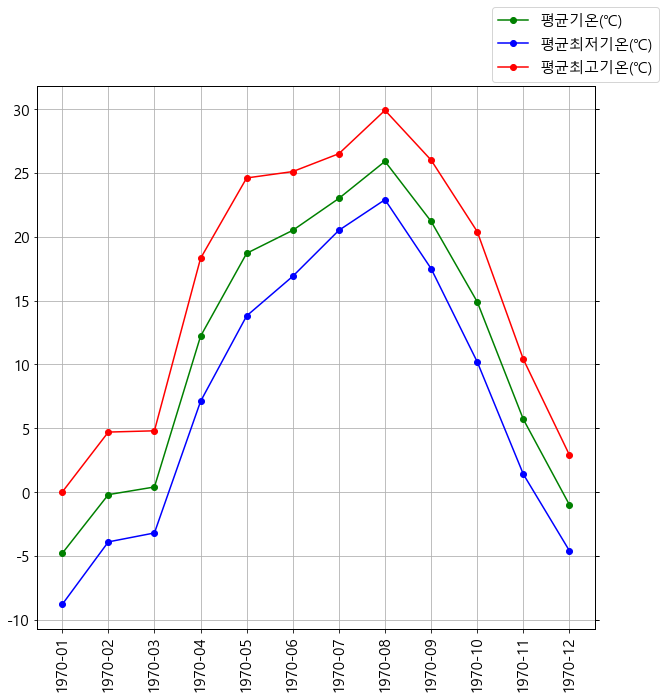

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 10), sharex=True, sharey=True) 
# figsize값을 튜플 형식으로 지정하면 그래프의 크기를 조정할 수 있음
# sharex와 sharey 인자에 True값을 넣으면 subplot으로 생성한 그래프에 x축과 y축이 공유됨
plt.rcParams['font.family'] = 'Malgun Gothic' # 폰트 지정
plt.xticks(rotation=90) # 눈금 설정 함수: .xticks() -> 90도로 회전
plt.grid(True) # 그래프에 선 추가

ax1.plot(list(map(lambda x: x[0:7], dates.tolist()[:12])), avg_temp.tolist()[:12], color="green",
        marker='o', markersize=6, label='평균기온(℃)') # marker값 사이트: https://matplotlib.org/stable/api/markers_api.html

ax2 = ax1.twinx() # 쌍각주 함수, x축을 공유하는 쌍둥이 축을 생성함
ax1.get_shared_y_axes().join(ax1, ax2) # ax1 그래프 y값 공유하기
ax2.set_yticklabels([]) # 오른쪽 y축 라벨값 공백 넣기 (지우기) 
print(dates.tolist()[:12]) # -> 0번째 인덱스 ~ 11번째 인덱스 -> 1970년 날짜 데이터
print(avg_low_temp[:12]) # -> 1970년 평균 최저기온 데이터
ax2.plot(list(map(lambda x: x[0:7], dates.tolist()[:12])), avg_low_temp[:12], color="blue",
        marker='o', markersize=6, label='평균최저기온(℃)') # 1970-01-01 날짜에서 일값은 제외한 라벨값만 지정함

ax3 = ax1.twinx()
ax1.get_shared_y_axes().join(ax1, ax3)
ax3.set_yticklabels([])
ax3.plot(list(map(lambda x: x[0:7], dates.tolist()[:12])), avg_high_temp[:12], color="red",
        marker='o', markersize=6, label='평균최고기온(℃)')

# 서브 플롯의 범례명에 대해서 단일 범례명 만들기
lines, labels = [], []
for ax in fig.axes:
    axline, axlabel = ax.get_legend_handles_labels() # legend 범례의 핸들값과 레이블값 반환
    print(axline, axlabel) # extend 함수를 써야 하는 이유 -> append()를 쓰면 리스트 자체를 추가하기 때문에 extend로 값만 추가
    lines.extend(axline)
    labels.extend(axlabel)
print(lines, labels)
fig.legend(lines, labels, loc='upper right') # loc값 사이트 https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html
plt.show()

# subplot을 이용해 한 그래프안에 여러개의 데이터 시각화하기
## **(2021년 평균, 평균최저, 평균최고 기온 데이터)**

[<matplotlib.lines.Line2D object at 0x000001BB57DA37F0>] ['평균기온(℃)']
[<matplotlib.lines.Line2D object at 0x000001BB59923880>] ['평균최저기온(℃)']
[<matplotlib.lines.Line2D object at 0x000001BB57FC3EE0>] ['평균최고기온(℃)']
[<matplotlib.lines.Line2D object at 0x000001BB57DA37F0>, <matplotlib.lines.Line2D object at 0x000001BB59923880>, <matplotlib.lines.Line2D object at 0x000001BB57FC3EE0>] ['평균기온(℃)', '평균최저기온(℃)', '평균최고기온(℃)']


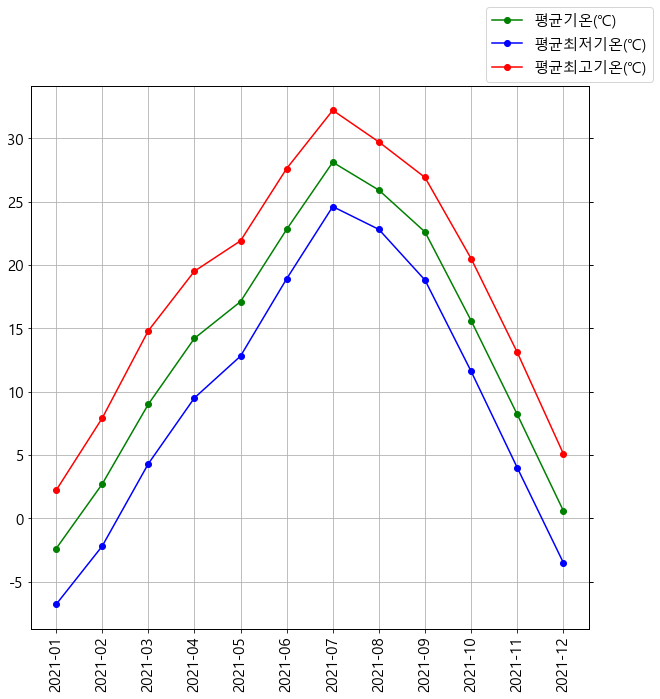

In [ ]:
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False # 음수값 깨짐 방지

fig, ax1 = plt.subplots(figsize=(10, 10), sharex=True, sharey=True)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.xticks(rotation=90)
plt.grid(True)

ax1.plot(list(map(lambda x: x[0:7], dates.tolist()[-12:])), avg_temp.tolist()[-12:], color="green",
        marker='o', markersize=6, label='평균기온(℃)')

ax2 = ax1.twinx() # 한 그래프에 두번째 plot 넣기
ax1.get_shared_y_axes().join(ax1, ax2) # ax1 그래프 y값 공유하기
ax2.set_yticklabels([]) # 오른쪽 y축 라벨값 지우기 
ax2.plot(list(map(lambda x: x[0:7], dates.tolist()[-12:])), avg_low_temp[-12:], color="blue",
        marker='o', markersize=6, label='평균최저기온(℃)')

ax3 = ax1.twinx()
ax1.get_shared_y_axes().join(ax1, ax3)
ax3.set_yticklabels([])
ax3.plot(list(map(lambda x: x[0:7], dates.tolist()[-12:])), avg_high_temp[-12:], color="red",
        marker='o', markersize=6, label='평균최고기온(℃)')

# 서브 플롯의 범례명에 대해서 단일 범례명 만들기
lines, labels = [], []
for ax in fig.axes:
    axline, axlabel = ax.get_legend_handles_labels()
    print(axline, axlabel) # extend 함수를 써야 하는 이유, append()를 쓰면 리스트 자체를 추가함
    lines.extend(axline)
    labels.extend(axlabel)
print(lines, labels)
fig.legend(lines, labels, loc='upper right')
plt.show()

# Line plot 시각화하기 (1970년~2021년) 평균 날씨 데이터
## **하나의 진폭당 1년**

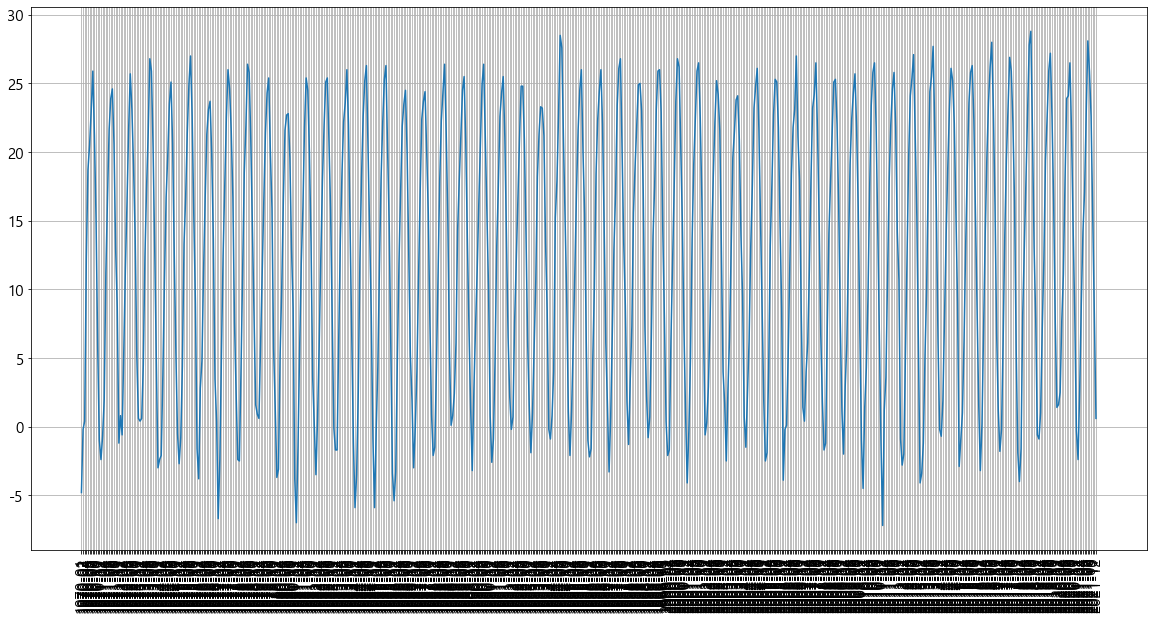

In [ ]:
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False # 음수값 깨짐 방지

fig = plt.figure(figsize=(20, 10))
plt.xticks(rotation=90)
plt.grid(True)
plt.plot(list(map(lambda x: x[0:7], dates.tolist())), avg_temp.tolist())
plt.show()

# 연별 최고 기온 데이터 구성

In [ ]:
start_idx = 0 # 초기값 지정
end_idx = 12
highest_temp = df[['최고기온(℃)', '	최고기온일자']].dropna(axis=0) # 최고기온 열과 최고기온일자 열을 dataframe 형식으로 가져오기
max_temps = [] # 연간 최고기온을 저장하는 리스트
max_dates = [] # 연간 최고기온 날짜를 저장하는 리스트

while end_idx <= len(highest_temp): # end_idx가 highest_temp의 원소 개수보다 크면 종료
    print(highest_temp[start_idx:end_idx], '\n')
    max_temp = highest_temp[start_idx:end_idx]['최고기온(℃)'].max() # 최고기온 열에 대한 최대값 (요청된 축에 대한 값의 최대값을 반환)
    max_temp_index = highest_temp[start_idx:end_idx]['최고기온(℃)'].idxmax() # 연별 최고기온 최대값의 인덱스 값
    max_date = highest_temp.loc[max_temp_index]['	최고기온일자'] # 연별 최고기온 최대값의 날짜 값 .loc 함수 -> index값에 맞는 행값 반환
    
    max_temps.append(max_temp)
    max_dates.append(max_date)
    
    print(max_temp) # 최고기온 열의 값 중 최고기온값이 최대값인 값을 출력 (생략)
    print(max_temp_index) # 연별 최고기온의 index값 출력
    print(max_date, '\n\n') # 연별 최고기온의 날짜값 출력
    
    start_idx += 12
    end_idx += 12

    최고기온(℃)    \t최고기온일자
0       8.9  1970-01-28
1      12.0  1970-02-19
2      16.0  1970-03-29
3      26.0  1970-04-30
4      29.8  1970-05-24
5      30.0  1970-06-07
6      32.2  1970-07-21
7      35.0  1970-08-12
8      31.2  1970-09-07
9      25.6  1970-10-07
10     18.2  1970-11-09
11     11.6  1970-12-17 

35.0
7
1970-08-12 


    최고기온(℃)    \t최고기온일자
12      9.2  1971-01-18
13     13.2  1971-02-22
14     20.2  1971-03-28
15     24.1  1971-04-27
16     31.2  1971-05-23
17     30.4  1971-06-08
18     32.0  1971-07-31
19     33.2  1971-08-03
20     29.6  1971-09-06
21     24.1  1971-10-09
22     21.3  1971-11-02
23     11.5  1971-12-02 

33.2
19
1971-08-03 


    최고기온(℃)    \t최고기온일자
24     13.0  1972-01-11
25      8.4  1972-02-10
26     18.0  1972-03-28
27     23.5  1972-04-24
28     26.2  1972-05-23
29     30.7  1972-06-06
30     35.6  1972-07-20
31     32.1  1972-08-17
32     27.2  1972-09-12
33     26.0  1972-10-09
34     18.7  1972-11-04
35     12.0  1972-12-05 

35.6
30
1972-07

# 연별 최고 기온 그래프 시각화
## **(최고기온일자 주석달기)**

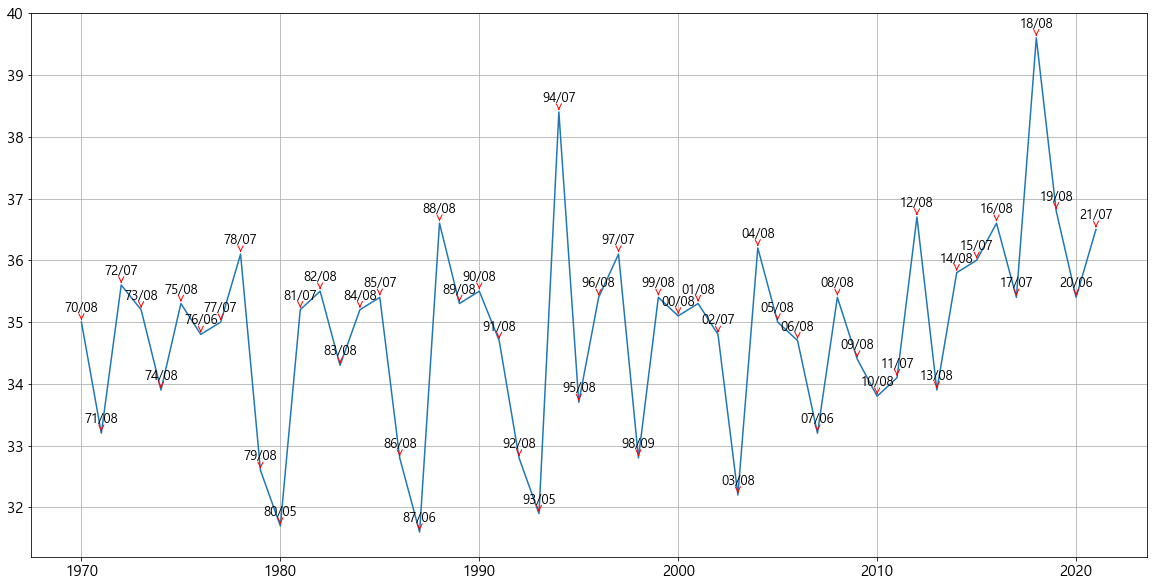

['08', '08', '07', '08', '08', '08', '06', '07', '07', '08', '05', '07', '08', '08', '08', '07', '08', '06', '08', '08', '08', '08', '08', '05', '07', '08', '08', '07', '09', '08', '08', '08', '07', '08', '08', '08', '08', '06', '08', '08', '08', '07', '08', '08', '08', '07', '08', '07', '08', '08', '06', '07']


In [ ]:
highest_months = [] # 연별 최고기온의 날짜값에서 월만 저장하는 리스트
years = [y for y in range(1970, 2022)] # 연도 라벨 데이터
fig = plt.figure(figsize=(20, 10))
plt.grid(True)
plt.plot(years, max_temps) # x값: 연도 리스트 y값: 연도별 최고기온 리스트

for x,y,d in zip(years, max_temps, max_dates): # zip을 사용하면 x, y, d값에 해당 인자값들을 iterator형식으로 들어가게 됨
    label = d[2:7].replace('-', '/') # ex) 70-08 날짜값을 70/08로 변환
    highest_months.append(d[5:7]) # 월만 저장

    # https://matplotlib.org/stable/tutorials/text/annotations.html
    plt.annotate(label, # 첫번째 인자값에 라벨값 지정
                 (x,y), # (x, y값의 그래프에 대한 위치값)
                 size=13,
                 textcoords="offset points", # xy(좌표 측의 값)에서부터 xytext offset 위치(단위 point)에 출력
                 xytext=(0,10), # 텍스트 띄어짐 정도
                 ha='center', # 텍스트 맞춤
                 arrowprops=dict(arrowstyle="->", color='red')) # 화살표 특성 지정

plt.show()
print(highest_months)

# 연별 최저 기온 데이터 구성

In [ ]:
start_idx = 0
end_idx = 12
lowest_temp = df[['최저기온(℃)', '최저기온일자']].dropna(axis=0)
min_temps = []
min_dates = []

while end_idx <= len(lowest_temp):
    print(lowest_temp[start_idx:end_idx], '\n')
    min_temp = lowest_temp[start_idx:end_idx]['최저기온(℃)'].min() # 연별 최고기온 최대값
    min_temp_index = lowest_temp[start_idx:end_idx]['최저기온(℃)'].idxmin() # 연별 최고기온 최대값의 인덱스 값
    min_date = lowest_temp.loc[min_temp_index]['최저기온일자'] # 연별 최고기온 최대값의 날짜 값
    
    min_temps.append(min_temp)
    min_dates.append(min_date)
    
    print(min_temp) # 최고기온 열의 값 중 최고기온값이 최대값인 값을 반환
    print(min_temp_index) # 최고기온 열의 값 중 최고기온값이 최대값인 index를 반환
    print(min_date, '\n\n')
    
    start_idx += 12
    end_idx += 12

    최저기온(℃)      최저기온일자
0     -20.2  1970-01-05
1     -10.8  1970-02-10
2      -7.3  1970-03-01
3       0.8  1970-04-08
4      10.0  1970-05-13
5      13.4  1970-06-17
6      15.2  1970-07-09
7      20.1  1970-08-19
8       7.9  1970-09-30
9       0.5  1970-10-30
10    -11.9  1970-11-30
11    -11.2  1970-12-27 

-20.2
0
1970-01-05 


    최저기온(℃)      최저기온일자
12    -16.1  1971-01-05
13    -12.4  1971-02-01
14    -11.6  1971-03-07
15      0.6  1971-04-04
16      7.0  1971-05-04
17     13.0  1971-06-04
18     18.6  1971-07-08
19     15.9  1971-08-19
20      9.7  1971-09-28
21      2.5  1971-10-12
22     -8.8  1971-11-29
23    -10.0  1971-12-22 

-16.1
12
1971-01-05 


    최저기온(℃)      최저기온일자
24     -9.1  1972-01-27
25     -9.6  1972-02-20
26     -7.7  1972-03-01
27     -4.3  1972-04-01
28      6.4  1972-05-15
29     13.7  1972-06-13
30     17.5  1972-07-01
31     15.8  1972-08-30
32      9.5  1972-09-30
33      0.5  1972-10-31
34     -8.1  1972-11-28
35    -12.0  1972-12-13 

-12.0
35
1972

# 연별 최저기온 그래프 시각화
## **(최저기온일자 주석달기)**

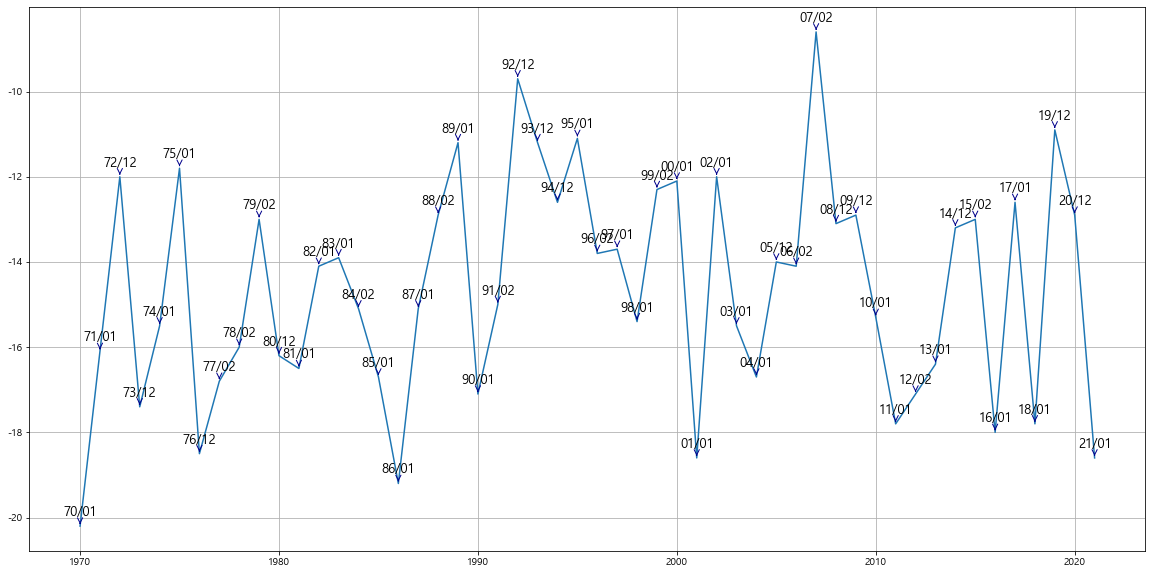

['01', '01', '12', '12', '01', '01', '12', '02', '02', '02', '12', '01', '01', '01', '02', '01', '01', '01', '02', '01', '01', '02', '12', '12', '12', '01', '02', '01', '01', '02', '01', '01', '01', '01', '01', '12', '02', '02', '12', '12', '01', '01', '02', '01', '12', '02', '01', '01', '01', '12', '12', '01']


In [ ]:
import matplotlib

lowest_months = []
years = [y for y in range(1970, 2022)]
fig = plt.figure(figsize=(20, 10))
matplotlib.rcParams['axes.unicode_minus'] = False # 음수값 깨짐 방지
plt.grid(True)
plt.plot(years, min_temps)

for x,y,d in zip(years, min_temps, min_dates):
    label = d[2:7].replace('-', '/')
    lowest_months.append(d[5:7])

    plt.annotate(label, # this is the value which we want to label (text)
                 (x,y), # x and y is the points location where we have to label
                 size=13,
                 textcoords="offset points",
                 xytext=(0,10), # this for the distance between the points
                 # and the text label
                 ha='center',
                 arrowprops=dict(arrowstyle="->", color='darkblue'))

plt.show()
print(lowest_months)

# 연별 최고기온, 최저기온 월 비율 Bar Plot & Pie Chart 시각화
## **(subplot 2x2 사이즈)**

['05', '05', '06', '06', '06', '06', '07', '07', '07', '07', '07', '07', '07', '07', '07', '07', '07', '07', '08', '08', '08', '08', '08', '08', '08', '08', '08', '08', '08', '08', '08', '08', '08', '08', '08', '08', '08', '08', '08', '08', '08', '08', '08', '08', '08', '08', '08', '08', '08', '08', '08', '09']
['01', '01', '01', '01', '01', '01', '01', '01', '01', '01', '01', '01', '01', '01', '01', '01', '01', '01', '01', '01', '01', '01', '01', '01', '01', '01', '01', '02', '02', '02', '02', '02', '02', '02', '02', '02', '02', '02', '02', '12', '12', '12', '12', '12', '12', '12', '12', '12', '12', '12', '12', '12']
['05', '06', '07', '08', '09']
['01', '02', '12']
{'05': 2, '06': 4, '07': 12, '08': 33, '09': 1}
{'01': 27, '02': 12, '12': 13}
[2, 4, 12, 33, 1]
[27, 12, 13]


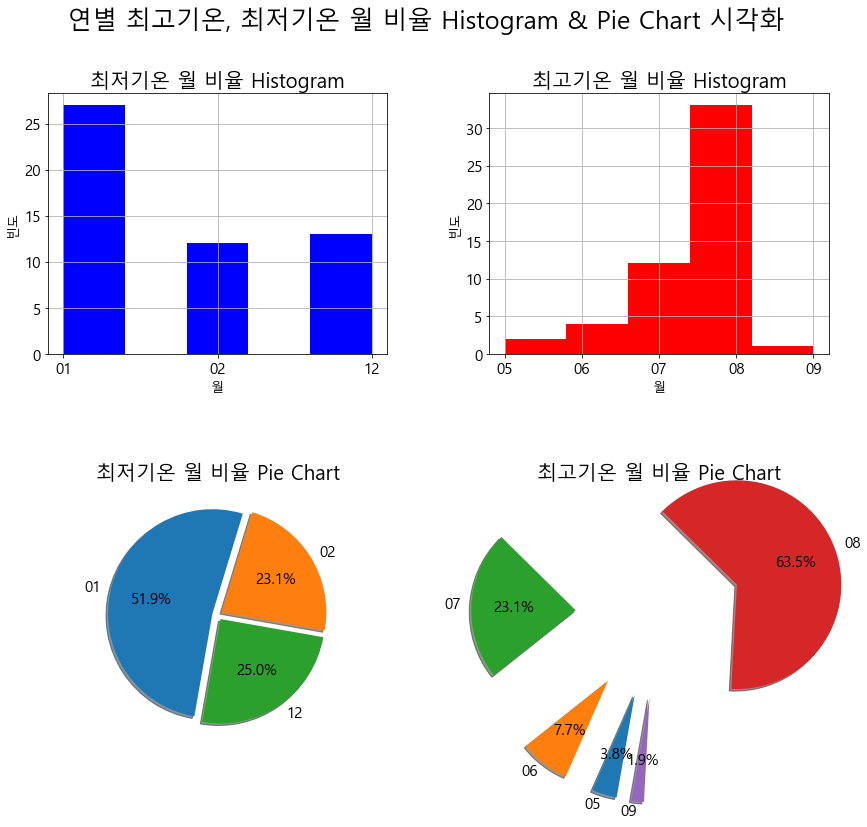

In [ ]:
def isDict(n_list):
    tmp_count = {}
    for n in n_list:
        if n in tmp_count: # n값이 tmp_count 딕셔너리에 존재한다면
            tmp_count[n] += 1 # key값이 n인 Value값 1 증가 
        else: # 존재하지 않는다면
            tmp_count[n] = 1 # Value값 1 지정

    return tmp_count # 딕셔너리 반환

highest_months = sorted(map(str, highest_months)) # 연별 최고기온 월 리스트 정렬 (기본값: 오름차순)
lowest_months = sorted(map(str, lowest_months)) # 연별 최저기온 월 리스트 정렬

print(highest_months)
print(lowest_months)

print(sorted(list(set(highest_months)))) # Pie Chart에 들어갈 labels, 집합 자료형으로 한번 형변환 하여 중복값을 제거함
print(sorted(list(set(lowest_months)))) 
num_high_month = isDict(highest_months) # 월 개수 카운트
num_low_month = isDict(lowest_months)
print(num_high_month)
print(num_low_month)
num_high_month = list(num_high_month.values()) # Pie Chart에 들어갈 비율(ratio) 지정, 딕셔너리의 Value값만 가져와 리스트로 형변환
num_low_month = list(num_low_month.values()) 
print(num_high_month)
print(num_low_month)

plt.rcParams.update({'font.size': 15}) # 그래프 전체 글씨 크기 변경

fig, axes = plt.subplots(2, 2) # 2x2 사이즈의 subplot 생성
fig.set_size_inches((14, 12)) # subplot 사이즈 지정
plt.subplots_adjust(wspace=0.3, hspace=0.5) # subplot 간의 공백 사이즈 지정
fig.suptitle('연별 최고기온, 최저기온 월 비율 Histogram & Pie Chart 시각화', fontsize=25) # 전체 그래프의 제목 지정

axes[0, 0].set_title("최저기온 월 비율 Histogram", fontsize=20) # subplot의 제목 지정
axes[0, 0].hist(lowest_months, bins=5, alpha=1, color='blue') # bin: 너비, alpha: 투명도
axes[0, 0].set_ylabel("빈도", fontsize=13)
axes[0, 0].set_xlabel("월", fontsize=13)
axes[0, 0].grid()

axes[0, 1].set_title("최고기온 월 비율 Histogram", fontsize=20)
axes[0, 1].hist(highest_months, bins=5, alpha=1, color='red') # bin: 너비, alpha: 투명도
axes[0, 1].set_ylabel("빈도", fontsize=13)
axes[0, 1].set_xlabel("월", fontsize=13)
axes[0, 1].grid()

axes[1, 0].set_title("최저기온 월 비율 Pie Chart", fontsize=20)
axes[1, 0].pie(num_low_month, labels=sorted(list(set(lowest_months))), autopct='%.1f%%', # 소수점 첫째자리까지 지정
               startangle=260, counterclock=False,  # 시작 앵글값 260도 지정
               explode=[0.05 for _ in range(len(num_low_month))], shadow=True) # explode -> Pie Chart 중심에서 부채꼴의 벗어남 정도
                # 리스트 컴프리헨션 방법으로 해당 리스트의 개수만큼 각 부채꼴의 벗어남 정도를 지정해줌

axes[1, 1].set_title("최고기온 월 비율 Pie Chart", fontsize=20)
axes[1, 1].pie(num_high_month, labels=sorted(list(set(highest_months))), autopct='%.1f%%',
               startangle=260, counterclock=False,
               explode=[0.8 for _ in range(len(num_high_month))], shadow=True)

plt.show()